## Understanding a $\chi^2$ test in Python
This notebook uses Python to review the basics of $\chi^2$ tests. They are a way to test for significance for categorical variables. It is a companion notebook to a blog post on the same topic.

I would also like to more completely understand the critical values used to compare $\chi^2$ values depending on the degrees of freedom.

In [1]:
#packages used in this notebook
import random
import numpy as np
from scipy.stats import norm
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [9]:
#generate random numbers to be categories
def simple_categorical(size=10):
    '''
    Gives a list of the given length of two pseudo-randomly-generated categories "first" and "second", relying on Python's
    random.randint method.
    
    Arguments:
            size (int) : a number describing how many items should be generated
    
    Returns:
            cat_list (list) : a list of size number of Strings, pseudo-randomly chosen to be "first" and "second"
    '''
    cat_list=[]
    
    for i in range(size): #loop through number of times given by size argument
        num = random.randint(1,2)
        if num ==1:
            cat="first"
        elif num==2:
            cat="second"
        cat_list.append(cat)
    
    return cat_list #return the list of Strings pseudo-randomly chosen

In [10]:
firseclist = simple_categorical(100)

In [11]:
#create a dataframe with categorical variables
newframe = pd.DataFrame({"catvar1":firseclist},index=range(100))
newframe.catvar1.value_counts()

second    57
first     43
Name: catvar1, dtype: int64

In [12]:
#convert to categorical type
newframe.astype({"catvar1":"category"})
newframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   catvar1  100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


### Hypothesis
The values that could be expected would be 50 for each category ("first" or "second") in `catvar1`. The null and alternative hypotheses are as follows:

$H_0$: The two categories are not significantly different from each other. (Both are 50.)

$H_A$: The two categories are significantly different from one another. (Neither are close to each other or 50.)

In this case, the p-value for significance will be 0.05, so if the p-value calculated from the $\chi^2$ test is lower than that, that would mean there is a probability of less than 5% that the null hypothesis is correct.

### Mathematics of Chi-squared
The chi-squared value is the sum as follows:
$$\sum \frac{(O-E)^2}{E}$$
where O is the observed value and E is the expected value.

In this example with `newframe`'s categorical variable `catvar1`, the frequencies are these values. O is the value counts for each and E is (somewhat arbitrarily) 50 because I could expect 100 random series of choices between "first" and "second" to be distributed exactly evenly.

In [18]:
#put the two value counts into their own list; observed
observed = []
valuecount = newframe.catvar1.value_counts()
observed = [valuecount[0],valuecount[1]]
observed

[57, 43]

In [19]:
#create function to get chi-squared
def chisquared(observations, expectations):
    '''
    Gives the list of chi-squared values calculated for each pair at the same index,
    according to (observation - expectation)^2/expectation.
    '''
    chi2list = []
    for obs,exp in zip(observations,expectations):
        chi2 = (obs-exp)**2/float(exp) # convert to float in case the value is an int so the division is more accurate
        chi2list.append(chi2)
    
    return chi2list

In [20]:
#calculate the summation
expected = [50,50] # a 50-50 split is what is expected
chisqval = sum(chisquared(observed,expected)) #sum the list from chisquared

In [24]:
print(f"The chi-squared value is {chisqval}.")

The chi-squared value is 1.96.


### The critical $\chi^2$ value
The critical value depends on the degrees of freedom and the p-value threshold. In this case, with two possible options for `catvar1`, the degree of freedom is $(2-1) = 1$. Also, when defining the hypothesis, the p-value was decided to be 0.05.

In [28]:
#initialize p-value and degrees of freedom
degf = len(observed)-1
pval = 0.05

The area to the right of the critical value in a $\chi^2$ distribution is what gets compared to the $\chi^2$ summation calculated above (stored in `chisqval`).

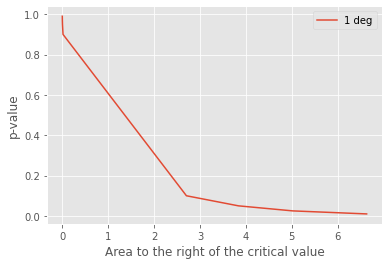

In [40]:
#create plot with values from chi-square table for 1 degree of freedom
x = [0,0.001,0.004,0.016,2.706,3.841,5.024,6.635]
pvals = [0.99,0.975,0.95,0.90,0.10,0.05,0.025,0.01]
plt.plot(x,pvals,label="1 deg")
plt.ylabel("p-value")
plt.xlabel("Area to the right of the critical value")
plt.legend()
plt.show()

Plots and calculations of area under the curve of a normal distribution with mean 0.5 and standard deviation 0.25. With this information, may compare to values from critical $\chi^2$ table.

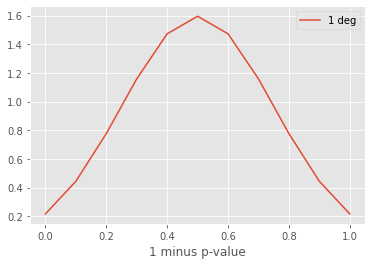

In [63]:
#plot normal distribution
x=np.arange(0,1.1,.1)
curve = norm.pdf(x, loc=.5, scale=.25)
plt.plot(x,curve,label="1 deg")
plt.xlabel("1 minus p-value")
plt.legend()
plt.show()

In [61]:
#create list of sums of the area to left of the curve
area_sum = []
total = 0
for each in curve:
    total+=each
    area_sum.append(total)

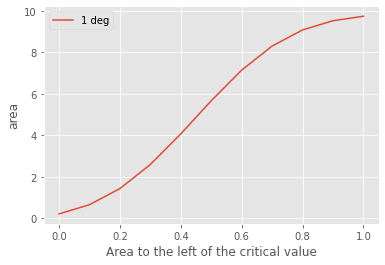

In [62]:
#create plot of area under the curve
plt.plot(x,area_sum,label="1 deg")
plt.ylabel("area")
plt.xlabel("Area to the left of the critical value")
plt.legend()
plt.show()